> ðŸš¨ **WARNING** ðŸš¨
>
> Many cells in this notebook will not show up when viewed on GitHub. Please view the HTML version of this notebook in the [docs](https://docs.rastervision.io/en/latest/usage/tutorials/index.html).

# Plot samples from `Dataset`s using `Visualizer`s

## Setup

In [2]:
from os.path import join

import matplotlib.pyplot as plt
import torch

from rastervision.pytorch_learner.dataset import (
    SemanticSegmentationSlidingWindowGeoDataset, 
    ObjectDetectionSlidingWindowGeoDataset,
    ClassificationSlidingWindowGeoDataset)
from rastervision.pytorch_learner.dataset.visualizer import (
    SemanticSegmentationVisualizer, 
    ObjectDetectionVisualizer,
    ClassificationVisualizer)
from rastervision.core.data import ClassConfig

In [3]:
# These examples all use a scene from the SpaceNet 2 buildings dataset.
image_uri = 's3://spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/PS-MS/SN2_buildings_train_AOI_5_Khartoum_PS-MS_img1004.tif'
label_uri = 's3://spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/geojson_buildings/SN2_buildings_train_AOI_5_Khartoum_geojson_buildings_img1004.geojson'

class_config = ClassConfig(
    names=['background', 'building'], 
    colors=['lightgray', 'darkred'],
    null_class='background')
chip_sz = 200
chip_stride = chip_sz // 2
# This describes how to group different input channels when plotting images.
# It's helpful when dealing with multiband imagery.
channel_display_groups = {'RGB': (0, 1, 2), 'IR': (3, )}

2022-09-22 19:55:13:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/PS-MS/SN2_buildings_train_AOI_5_Khartoum_PS-MS_img1004.tif.
2022-09-22 19:55:14:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/geojson_buildings/SN2_buildings_train_AOI_5_Khartoum_geojson_buildings_img1004.geojson.


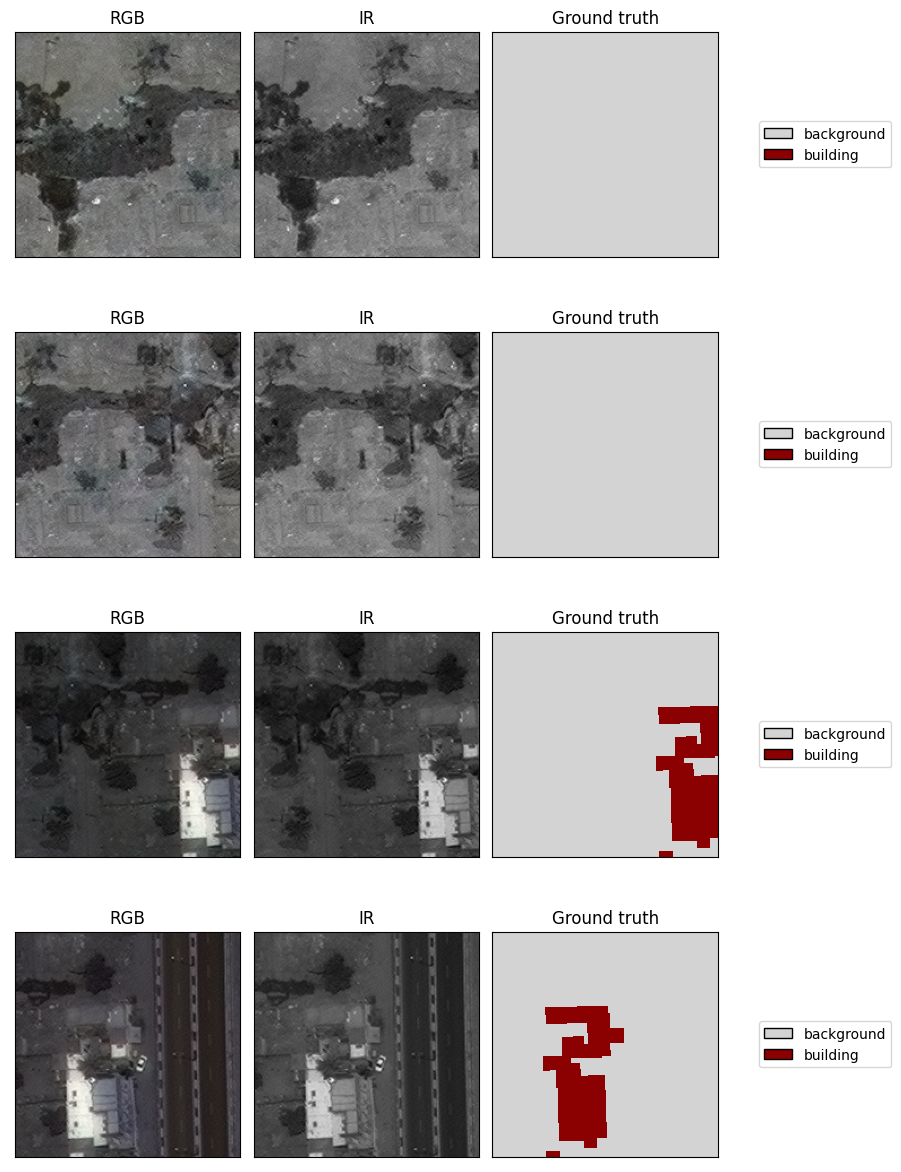

In [5]:
ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    label_vector_default_class_id=class_config.get_class_id('building'),
    image_raster_source_kw=dict(allow_streaming=True),
    size=chip_sz,
    stride=chip_stride)

vis = SemanticSegmentationVisualizer(
    class_names=class_config.names, class_colors=class_config.colors,
    channel_display_groups=channel_display_groups)
x, y = vis.get_batch(ds, 4)
vis.plot_batch(x, y, show=True)

The `Visualizer` can also display predictions alongside ground truth labels. Here we will use the ground truth labels as mock predictions for testing purposes, simulating a model with perfect accuracy.

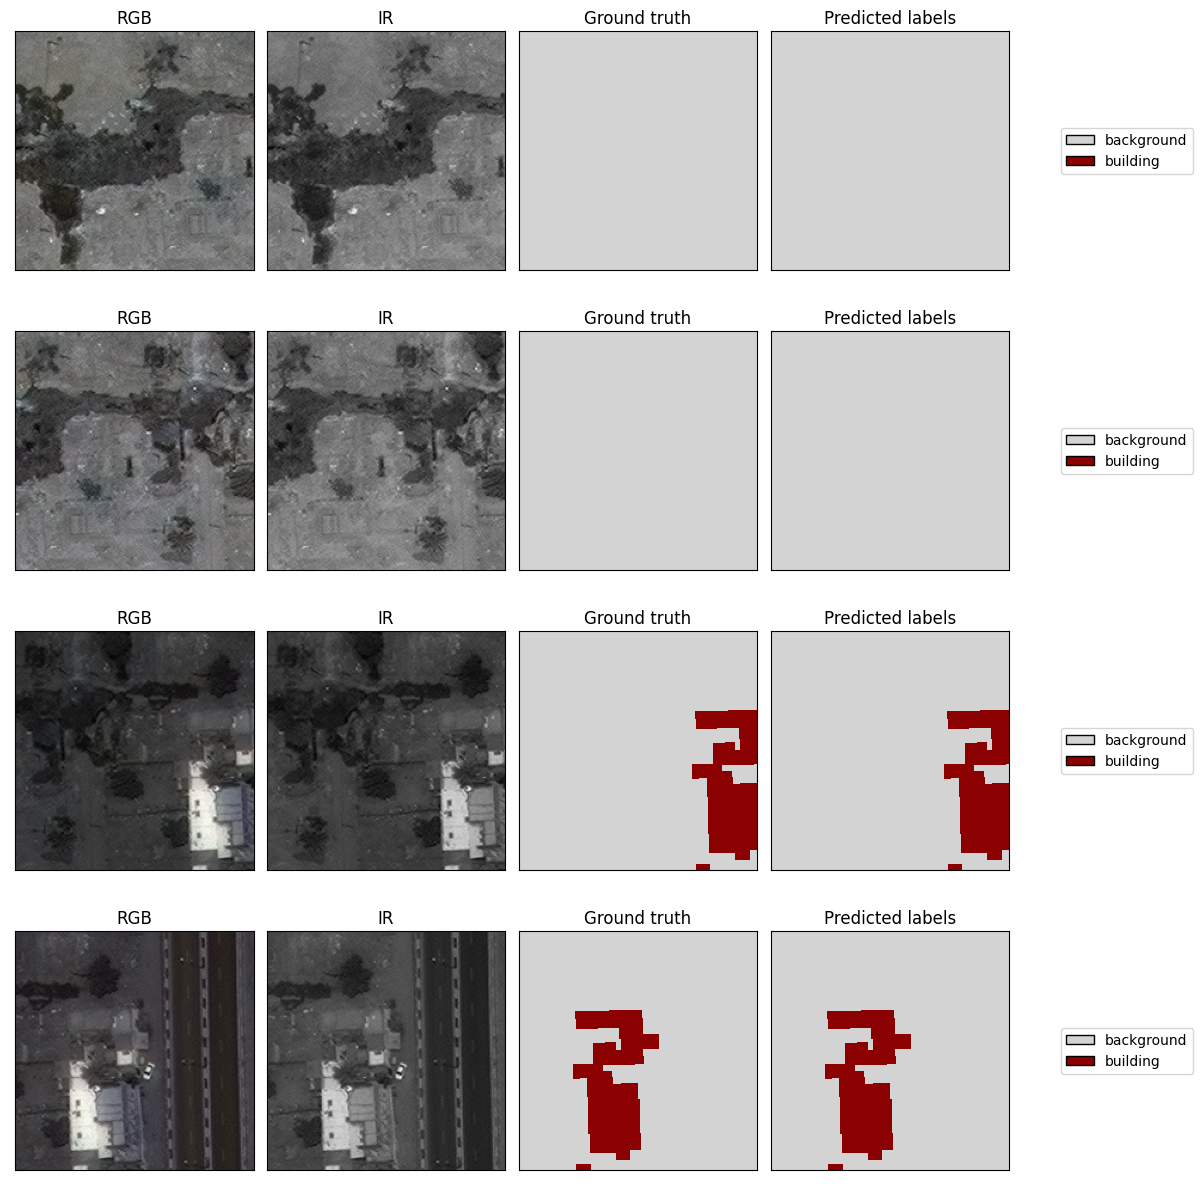

In [17]:
z = torch.zeros((4, 3, 200, 200))
z[:, 1, :, :] = y
vis.plot_batch(x, y, z=z, show=True)

2022-09-14 18:54:38:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/PS-MS/SN2_buildings_train_AOI_5_Khartoum_PS-MS_img1004.tif.
2022-09-14 18:54:38:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/geojson_buildings/SN2_buildings_train_AOI_5_Khartoum_geojson_buildings_img1004.geojson.


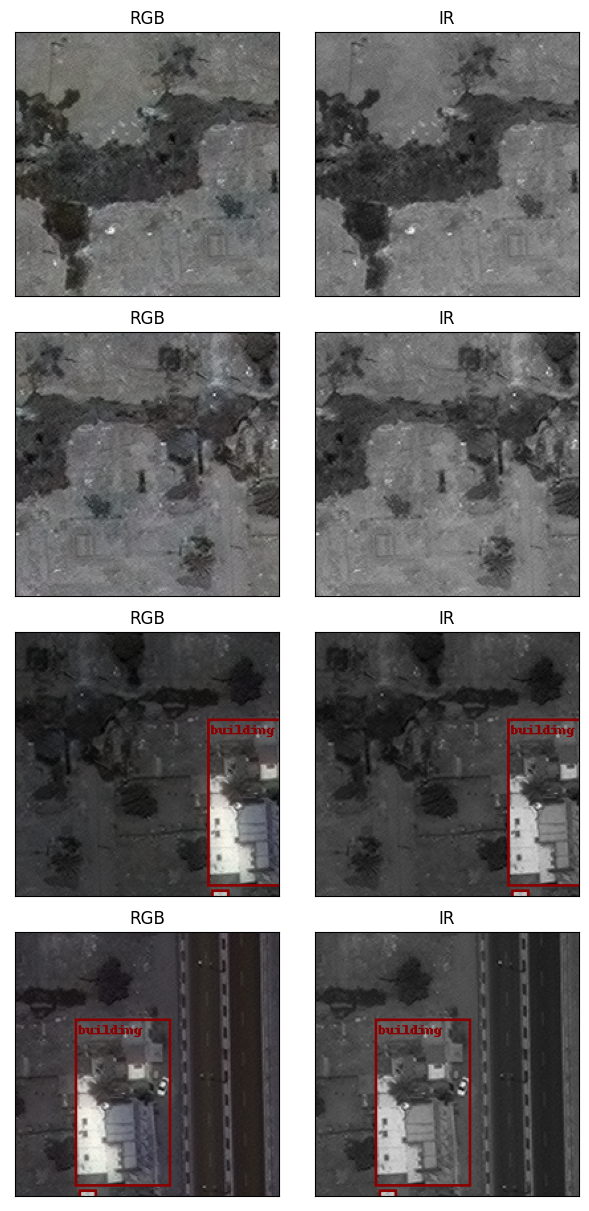

In [6]:
ds = ObjectDetectionSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    size=chip_sz,
    stride=chip_stride,
    label_vector_default_class_id=class_config.get_class_id('building'),
    image_raster_source_kw=dict(allow_streaming=True))

vis = ObjectDetectionVisualizer(
    class_names=class_config.names, class_colors=class_config.colors,
    channel_display_groups=channel_display_groups)
x, y = vis.get_batch(ds, 4)
vis.plot_batch(x, y, show=True)

2022-09-14 17:49:50:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/PS-MS/SN2_buildings_train_AOI_5_Khartoum_PS-MS_img1004.tif.
2022-09-14 17:49:50:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/spacenet-dataset/spacenet/SN2_buildings/train/AOI_5_Khartoum/geojson_buildings/SN2_buildings_train_AOI_5_Khartoum_geojson_buildings_img1004.geojson.


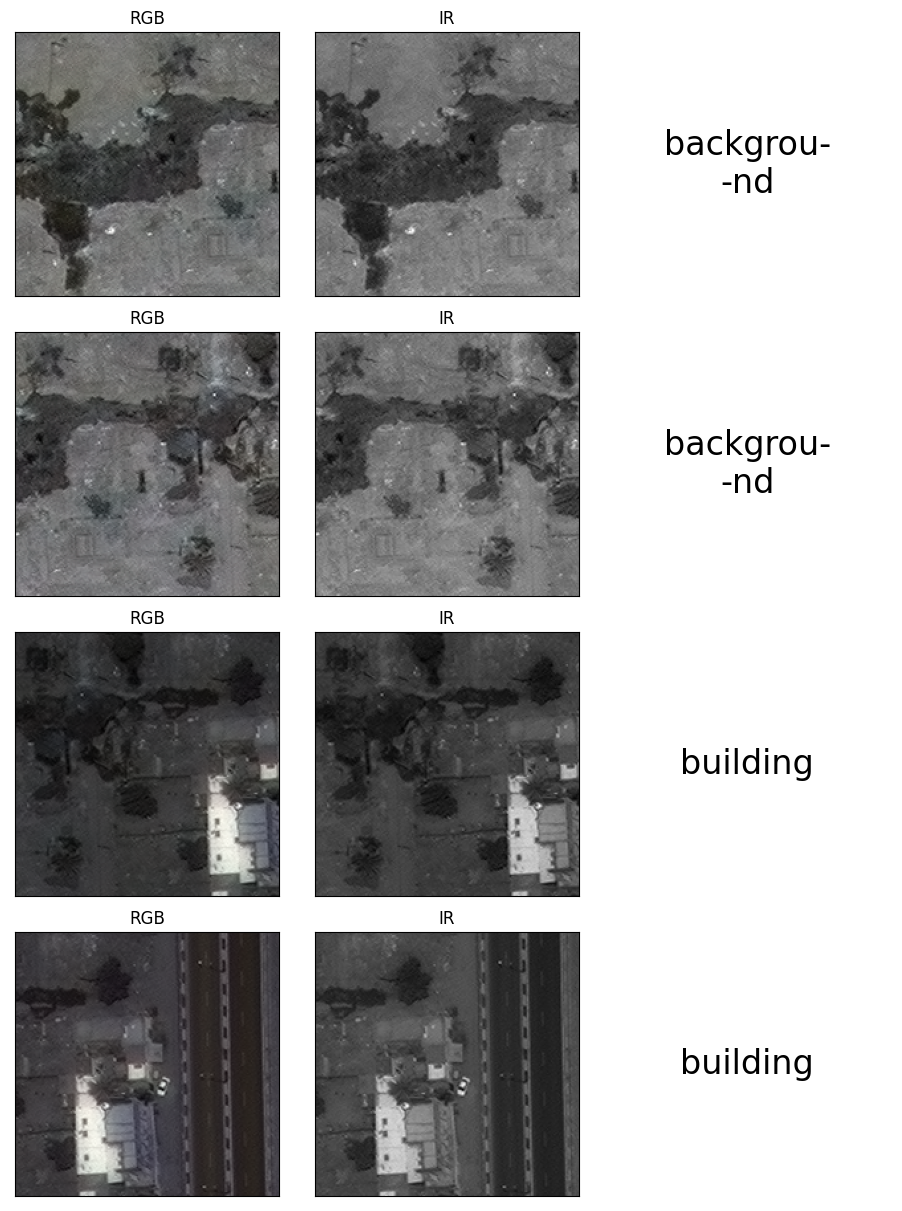

In [ ]:
ds = ClassificationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    label_vector_default_class_id=class_config.get_class_id('building'),
    size=chip_sz,
    stride=chip_stride,
    label_source_kw=dict(
        ioa_thresh=0.5,
        use_intersection_over_cell=False,
        pick_min_class_id=False,
        background_class_id=class_config.get_class_id('background'),
        infer_cells=True,
        cell_sz=chip_sz))
vis = ClassificationVisualizer(
    class_names=class_config.names, class_colors=class_config.colors,
    channel_display_groups=channel_display_groups)
x, y = vis.get_batch(ds, 4)
vis.plot_batch(x, y, show=True)